## CPLEX example

This notebook demonstrates how to use `optiwindnet` to design collector system cable layouts using the **CPLEX MILP router**.

In [39]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, load_repository

In [40]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

In [41]:
from pyomo import environ as pyo

### Initialize Race Bank 2

>In this example, the `load_repository()` functionality is used to load a prebuilt *Networkx.Graph*. For more details on this functionality look into the notebook about [Load repositories containing location data](api_02-load-repositories.ipynb).

In [42]:
locations = load_repository()

In [43]:
L = locations.race
max_cables_capacity = 5

In [44]:
wfn = WindFarmNetwork(L=L, cables=max_cables_capacity)

### Optimize Race Bank 2

Initial heuristic solution to warm-start the solver:

In [46]:
router_warmstart = Heuristic(solver='Esau_Williams')
res_warmstart= wfn.optimize(router=router_warmstart)
print(wfn.length())

94059.52543431189


In [47]:
router_milp = MILP(solver_name='cplex', time_limit=15, mip_gap=0.01, verbose=True)
res = wfn.optimize(router=router_milp)

>>> Using warm start: the model is initialized with the provided solution S <<<


Using size restricted mode (Could not find directory for cpxchecklic).
CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm.biz/error1016.


CplexSolverError: CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm.biz/error1016.

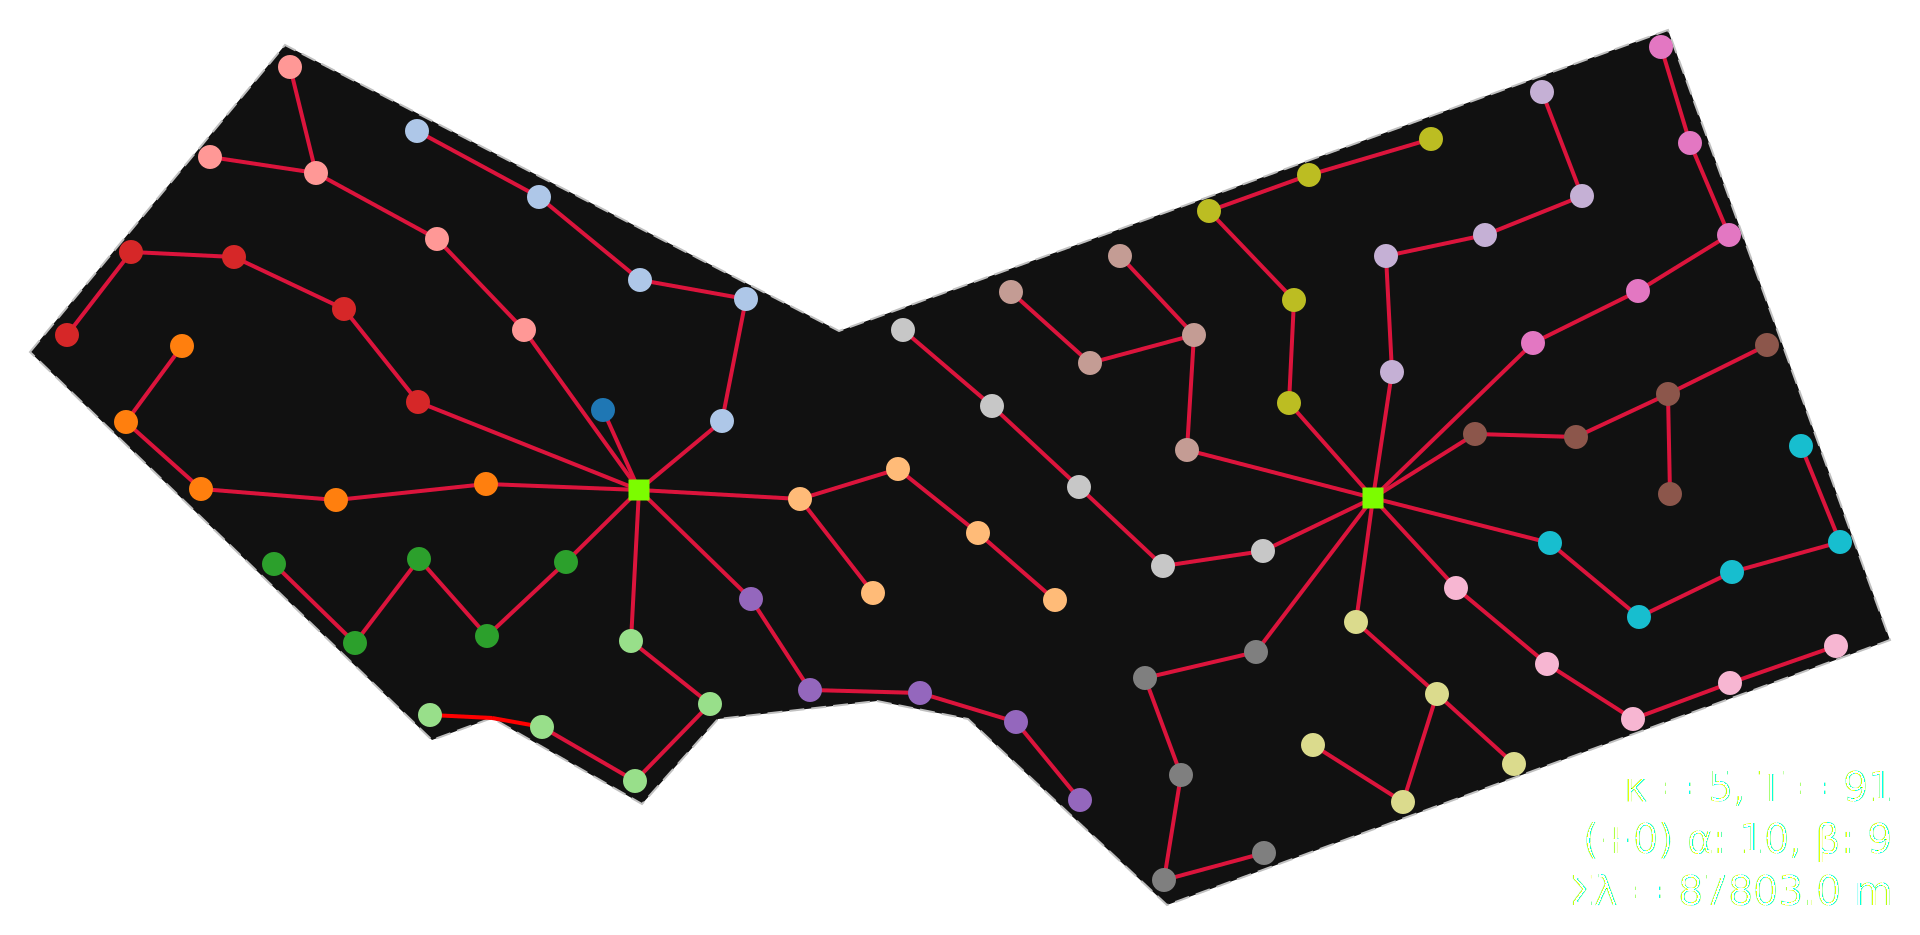

In [ ]:
wfn.length()

In [ ]:
wfn.plot()